In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt
import os
from random import sample

In [2]:
def list_files_with_absolute_paths(dirpath: str, endswith: str = None):  # type: ignore
    files = []
    for dirname, dirnames, filenames in os.walk(dirpath):
        files += [
            os.path.join(dirname, filename)
            for filename in filenames
            if filename.endswith(endswith)
        ]
    return files


# Prepration Data

## Train data

In [3]:
list_train_turbin = list_files_with_absolute_paths('../data/train/target',endswith='jpg')
list_train_background = list_files_with_absolute_paths('../data/train/background',endswith='jpg')

In [4]:
len(list_train_turbin), len(list_train_background)

(154942, 202565)

In [5]:
df_train_turbin= pd.DataFrame(list_train_turbin,columns=['PATH'])
df_train_turbin.loc[:, ['label']]=1

df_train_background = pd.DataFrame(list_train_background,columns=['PATH'])
df_train_background.loc[:, ['label']]=0

In [7]:
train_data = pd.concat([df_train_turbin,df_train_background])
train_data.to_csv('../data/train/train_data.csv',index=False)

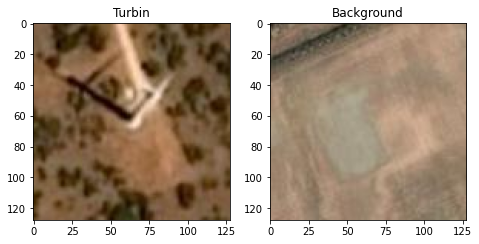

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.imshow(Image.open(train_data.iloc[2001,0]))
plt.title('Turbin')
plt.subplot(232)
plt.imshow(Image.open(train_data.iloc[-2001,0]))
plt.title('Background')
plt.show()

# Validation Data

In [9]:
list_validation_turbin = list_files_with_absolute_paths('../data/val/target',endswith='jpg')
list_validation_background = list_files_with_absolute_paths('../data/val/background',endswith='jpg')

In [10]:
len(list_validation_turbin), len(list_validation_background)

(30991, 40513)

In [11]:
df_validation_turbin = pd.DataFrame(list_validation_turbin,columns=['PATH'])
df_validation_turbin.loc[:, ['label']]=1

df_validation_background = pd.DataFrame(list_validation_background,columns=['PATH'])
df_validation_background.loc[:, ['label']]=0

In [12]:
validation_data = pd.concat([df_validation_turbin,df_validation_background])

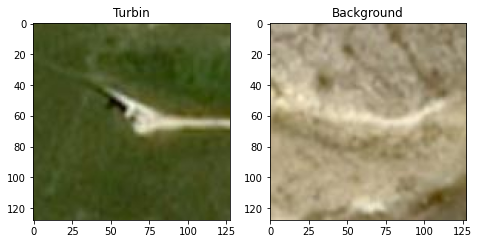

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.imshow(Image.open(validation_data.iloc[2001,0]))
plt.title('Turbin')
plt.subplot(232)
plt.imshow(Image.open(validation_data.iloc[-2001,0]))
plt.title('Background')
plt.show()

In [14]:
X_val, X_test, y_val, y_test = train_test_split(validation_data.PATH.to_numpy(), validation_data.label.to_numpy(), test_size=0.2, random_state=42)

In [15]:
val_data = pd.DataFrame({'PATH':X_val,'label':y_val})
test_data = pd.DataFrame({'PATH':X_test,'label':y_test})

In [21]:
len(val_data), len(test_data)

(57203, 14301)

In [22]:
val_data.to_csv('../data/val/val_data.csv',index=False)
test_data.to_csv('../data/val/test_data.csv',index=False)

# Data Loader

In [32]:
class LoadImageData(Dataset):
    def __init__(self,dataset_path,transform=T.Compose([T.ToTensor()])):
        # data loading
        self.dataset = pd.read_csv(dataset_path)
        self.n_samples = len(self.dataset)
        
        self.transform = transform
    def __len__(self):
        return self.n_samples

    def __getitem__(self,idx):
        self.X = Image.open((self.dataset.loc[idx,'PATH']))
        self.y = self.dataset.loc[idx,'label']
        
        if self.transform:
            self.X = self.transform(self.X)
            self.y = torch.as_tensor(self.y.astype(np.float32))
        
        return self.X,self.y
        

In [33]:
composed_train = T.Compose([T.RandomHorizontalFlip(),
                            T.RandomVerticalFlip(),
                            T.ToTensor()])

In [34]:
img = LoadImageData('../data/train/train_data.csv',transform=composed_train)

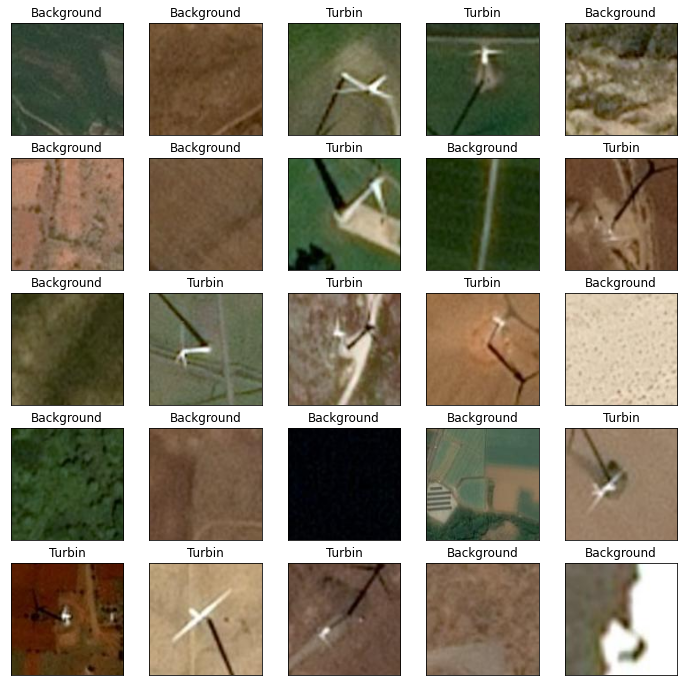

In [35]:
plt.figure(figsize=(12,12))
for i, j in enumerate(sample(range(0, 357506), 50)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    code = img[j][1]
    plt.imshow(np.moveaxis(img[j][0].cpu().detach().numpy(),0,-1))
    if code == 1:
        plt.title('Turbin')
    else:
        plt.title('Background')
    if i==24:
        break

In [39]:
img[j][0]

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.3569, 0.3490, 0.3451],
         [1.0000, 1.0000, 1.0000,  ..., 0.3608, 0.3529, 0.3490],
         [1.0000, 1.0000, 1.0000,  ..., 0.3686, 0.3608, 0.3569],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.4392, 0.4392, 0.4392],
         [1.0000, 1.0000, 1.0000,  ..., 0.4392, 0.4392, 0.4392],
         [1.0000, 1.0000, 1.0000,  ..., 0.4353, 0.4353, 0.4353]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.3647, 0.3647, 0.3608],
         [1.0000, 1.0000, 1.0000,  ..., 0.3686, 0.3686, 0.3647],
         [1.0000, 1.0000, 1.0000,  ..., 0.3765, 0.3765, 0.3725],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.4078, 0.4078, 0.4078],
         [1.0000, 1.0000, 1.0000,  ..., 0.4078, 0.4078, 0.4078],
         [1.0000, 1.0000, 1.0000,  ..., 0.4039, 0.4039, 0.4039]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.2824, 0.2745, 0.2706],
         [1.0000, 1.0000, 1.0000,  ..., 0.2863, 0.2784, 0.2745],
         [1.0000, 1.0000, 1.0000,  ..., 0.2941, 0.2863, 0.